In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
from os.path import isdir, isfile, join

import peakutils
import matplotlib.pyplot as plt
from peakutils.plot import plot as pplot
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

# preprocessing from each files 

In [2]:
def read_file(name, foot):
    if foot == 'rightfoot':
        _type = 'R'
    if foot == 'leftfoot':
        _type = 'L'
        
    fileName = name + "/" + foot + "/acc.xls"
    df = pd.read_table(fileName,header=-1)
    df['time']=df[0]
    df['acc'+_type]=(df[1]**2 + df[2]**2 + df[3]**2)**(0.5)
    df_acc = df[['time','acc'+_type]]
    
    fileName = name + "/" + foot + "/Gyro.xls"
    df = pd.read_table(fileName,header=-1)
    df['time']=df[0]
    df['gyro'+_type]=(df[1]**2 + df[2]**2 + df[3]**2)**(0.5)
    df_gyro = df[['time','gyro'+_type]]
    
    fileName = name + "/" + foot + "/Center of gravity.xls"
    df = pd.read_table(fileName,header=-1)
    df['time']=df[0]
    df['gravity'+_type]=(df[1]**2 + df[2]**2)**(0.5)
    df_cog = df[['time','gravity'+_type]]

    fileName = name + "/" + foot + "/Variation_total_pressure.xls"
    df = pd.read_table(fileName,header=-1)
    df_vtp = df.rename(columns={df.columns[0]: 'time',df.columns[1]: 'votp'+_type})
    y = df_vtp['votp'+_type]

    df_all = df_acc.merge(df_gyro,on='time').merge(df_cog,on='time').merge(df_vtp,on='time')
    return df_all

In [3]:
def normalize(df_all):
    StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler = StandardScaler()
    # exclude time
    scaler.fit_transform(df_all.iloc[:,1:])

    df_all_columns = df_all.columns[1:]
    x_scaled = scaler.transform(df_all.iloc[:,1:])

    df_all.iloc[:,1:] = x_scaled
    return df_all

In [4]:
def peak_valley(df_all, foot, runner):
    if foot == 'rightfoot':
        _type = 'R'
    if foot == 'leftfoot':
        _type = 'L'

    y = df_all['votp'+_type]
    indexes = peakutils.indexes(y, thres=0.5, min_dist=22)
    df_all['peak'+_type] = 0
    df_all.loc[df_all.index[indexes], 'peak'+_type] = 1
    peak = df_all.loc[df_all['peak'+_type]==1]

    indexes = peakutils.indexes(-y, thres=0.5, min_dist=30)
    df_all['valley'+_type]=0
    df_all.loc[df_all.index[indexes], 'valley'+_type] = 1
    valley = df_all.loc[df_all['valley'+_type]==1]
    
    fileName = runner + '_' + foot + '.csv'
    df_all.to_csv(fileName, index = False)
    fileList.append(fileName)
    
    return fileList    

In [5]:
# get all runners' names from the folder
runners = [i for i in [f for f in listdir('./') if isdir(join('./', f))] if i[0] != '.']
feet = ['rightfoot', 'leftfoot']

In [6]:
# use the functions to preprocess each runner
fileList = []
for runner in runners:
    for foot in feet:
        df_all = read_file(runner, foot)
        df_all = normalize(df_all)
        fileList = peak_valley(df_all, foot, runner)

In [7]:
fileList

['BinJoe_rightfoot.csv',
 'BinJoe_leftfoot.csv',
 'chanHon_rightfoot.csv',
 'chanHon_leftfoot.csv',
 'ChiSan_rightfoot.csv',
 'ChiSan_leftfoot.csv',
 'chunLin_rightfoot.csv',
 'chunLin_leftfoot.csv',
 'HuaiYu_rightfoot.csv',
 'HuaiYu_leftfoot.csv',
 'JiaLin_rightfoot.csv',
 'JiaLin_leftfoot.csv',
 'Pohan_rightfoot.csv',
 'Pohan_leftfoot.csv',
 'YuanChi_rightfoot.csv',
 'YuanChi_leftfoot.csv']

# combine left&right foot

In [159]:
dfAll = pd.DataFrame()
dfLeft = pd.read_csv("chanHon_rightfoot.csv")
dfRight = pd.read_csv("chanHon_leftfoot.csv")
dfAll = dfLeft.merge(dfRight,on='time')
dfAll.tail(8)

,time,accR,gyroR,gravityR,votpR,peakR,valleyR,accL,gyroL,gravityL,votpL,peakL,valleyL
3649,2018-07-17 14:36:50.564,-0.743104,-1.235290,0.008477,-0.034640,0,0,-0.769024,-1.203616,0.045662,1.033741,0,0
3650,2018-07-17 14:36:50.596,-0.743194,-1.235405,-0.004887,-0.040024,0,0,-0.769024,-1.203616,0.045662,1.033741,0,0
3651,2018-07-17 14:36:50.629,-0.743194,-1.235405,-0.004887,-0.040024,0,0,-0.773737,-1.207284,0.020026,1.039754,0,0
3652,2018-07-17 14:36:50.662,-0.742743,-1.238257,-0.004887,-0.057006,0,1,-0.774123,-1.207864,0.020026,1.043361,0,0
3653,2018-07-17 14:36:50.694,-0.742743,-1.238257,-0.004887,-0.057006,0,0,-0.771938,-1.205438,-0.005585,1.048172,0,0
3654,2018-07-17 14:36:50.727,-0.749381,-1.238811,-0.033533,-0.054934,0,0,-0.762696,-1.204159,-0.031172,1.056991,0,0
3655,2018-07-17 14:36:50.761,-0.749494,-1.237534,-0.062137,-0.054931,0,0,-0.772572,-1.203509,-0.031172,1.067413,0,0
3656,2018-07-17 14:36:50.793,-0.749494,-1.237534,-0.062137,-0.054931,0,0,-0.761986,-1.199983,-0.056732,1.076633,0,0


In [160]:
period_index = [0, 621, 1313, 2004, 3107, 3310, 3656]

# Split Cycle

In [161]:
wave = pd.DataFrame()
for i in range(len(period_index)-1):
    wave.loc[i, 'time'] = dfAll['time'][period_index[i]]
    wave.loc[i, 'startIndex'] = period_index[i]
    wave.loc[i, 'endIndex'] = period_index[i+1]
wave

,time,startIndex,endIndex
0,2018-07-17 14:34:50.146,0.0,621.0
1,2018-07-17 14:35:10.638,621.0,1313.0
2,2018-07-17 14:35:33.474,1313.0,2004.0
3,2018-07-17 14:35:56.278,2004.0,3107.0
4,2018-07-17 14:36:32.677,3107.0,3310.0
5,2018-07-17 14:36:39.376,3310.0,3656.0


In [162]:
dfVotp = pd.DataFrame()
votp_index = dfAll.index.values

for i in range(len(votp_index)):
    if i == 0:
        dfVotp.loc[i, 'time'] = dfAll['time'][0]
        dfVotp.loc[i, 'startIndex'] = votp_index[i]
    elif i == len(votp_index)-2:
        dfVotp.loc[i, 'time'] = dfAll['time'][i]
        dfVotp.loc[i, 'startIndex'] = (len(votp_index)-1)
    elif i == len(votp_index)-1:
        dfVotp.loc[i, 'time'] = dfAll['time'][i]
        dfVotp.loc[i, 'startIndex'] = (len(votp_index)-1)
    else:
        if dfAll['votpR'][i]<dfAll['votpL'][i] and dfAll['votpR'][i+1]>dfAll['votpL'][i+1]:
            dfVotp.loc[i, 'time'] = dfAll['time'][votp_index[i]]
            dfVotp.loc[i, 'startIndex'] = votp_index[i]
        if dfAll['votpR'][i]>dfAll['votpL'][i] and dfAll['votpR'][i+1]<dfAll['votpL'][i+1]:
            dfVotp.loc[i, 'time'] = dfAll['time'][votp_index[i]]
            dfVotp.loc[i, 'startIndex'] = votp_index[i]

dfVotp = dfVotp.reset_index(drop=True)
row_index = dfVotp.index.values

for row in range(len(dfVotp)-2):
    dfVotp.loc[row, 'endIndex'] = dfVotp['startIndex'][row+1]
    dfVotp.loc[row, 'indexDiff'] = dfVotp['endIndex'][row] - dfVotp['startIndex'][row]
dfVotp = dfVotp[:-2]

dfVotp.tail()

,time,startIndex,endIndex,indexDiff
226,2018-07-17 14:36:43.171,3425.0,3441.0,16.0
227,2018-07-17 14:36:43.698,3441.0,3539.0,98.0
228,2018-07-17 14:36:46.932,3539.0,3563.0,24.0
229,2018-07-17 14:36:47.726,3563.0,3606.0,43.0
230,2018-07-17 14:36:49.144,3606.0,3656.0,50.0


In [163]:
# add feature 
from datetime import datetime
row_index = wave.index.values
votp_index = dfVotp.index.values

for i in range(len(row_index)):
    start = int(wave['startIndex'][i])
    end = int(wave['endIndex'][i])
    
    startTime = datetime.strptime(dfAll['time'][start], '%Y-%m-%d %H:%M:%S.%f')
    endTime = datetime.strptime(dfAll['time'][end], '%Y-%m-%d %H:%M:%S.%f')
    duration = str(endTime - startTime)
    duration = float(''.join(list(duration)[5:-3]))
    
    votpCross = 0
    indexMax = 0
    indexMin = 150
    for j in range(len(votp_index)):
        if start < dfVotp['startIndex'][j] and dfVotp['startIndex'][j] < end:
            votpCross += 1
            if dfVotp['indexDiff'][j] > indexMax:
                indexMax = dfVotp['indexDiff'][j]
            if dfVotp['indexDiff'][j] < indexMin:
                indexMin = dfVotp['indexDiff'][j]
                
        wave.loc[i, 'votpCross'] = votpCross / duration
        wave.loc[i, 'indexMax'] = indexMax
        wave.loc[i, 'indexMin'] = indexMin
    wave.loc[i, 'frequency'] = votpCross / duration
    
    wave.loc[i, 'votpMean'] = (dfAll['votpR'][start:end].values+dfAll['votpL'][start:end].values).mean()

In [164]:
wave

,time,startIndex,endIndex,votpCross,indexMax,indexMin,frequency,votpMean
0,2018-07-17 14:34:50.146,0.0,621.0,1.317587,103.0,1.0,1.317587,0.390590
1,2018-07-17 14:35:10.638,621.0,1313.0,1.707830,25.0,14.0,1.707830,0.073978
2,2018-07-17 14:35:33.474,1313.0,2004.0,2.061042,17.0,13.0,2.061042,-0.023432
3,2018-07-17 14:35:56.278,2004.0,3107.0,2.582489,13.0,10.0,2.582489,-0.337614
4,2018-07-17 14:36:32.677,3107.0,3310.0,1.940588,22.0,12.0,1.940588,-0.053759
5,2018-07-17 14:36:39.376,3310.0,3656.0,0.788298,98.0,16.0,0.788298,0.302663


In [165]:
# add feature: acc and gyro
#acc: each foot has x,y,z three value, combine by square sum root, and add two feet together
#_acc: count peak and valley for acc
#accMean: calculate mean
dfAll['acc'] = dfAll['accL']+dfAll['accR']
dfAll['gyro'] = dfAll['gyroL']+dfAll['gyroR']
dfAll['gravity'] = dfAll['gravityL']+dfAll['gravityR']

accPeak = peakutils.indexes(dfAll["acc"], thres=0.001, min_dist=2.5)
accValley = peakutils.indexes(-dfAll["acc"], thres=0.001, min_dist=2.5)
accIndex = np.concatenate((accPeak, accValley), axis=None)

gyroPeak = peakutils.indexes(dfAll["gyro"], thres=0.001, min_dist=2.5)
gyroValley = peakutils.indexes(-dfAll["gyro"], thres=0.001, min_dist=2.5)
gyroIndex = np.concatenate((gyroPeak, gyroValley), axis=None)

In [166]:
for i in range(len(row_index)):
    start = int(wave['startIndex'][i])
    end = int(wave['endIndex'][i])
    votpRSpeed = np.absolute(dfAll['votpR'][start:end].values).mean()
    votpLSpeed = np.absolute(dfAll['votpL'][start:end].values).mean()
    wave.loc[i, 'votpSpeed'] = votpRSpeed + votpLSpeed
    wave.loc[i, 'accMean'] = np.absolute(dfAll['acc'][start:end].values).mean()
    wave.loc[i, 'gyroMean'] = np.absolute(dfAll['gyro'][start:end].values).mean()
    wave.loc[i, 'gravityspeed'] = np.absolute(dfAll['gravity'][start:end].values).mean()
    _acc = 0
    _gyro = 0
    for j in accIndex:
        if start<=j and j<end:
            _acc += 1
    for j in gyroIndex:
        if start<=j and j<end:
            _gyro += 1
    
    indexDiff = wave['endIndex'][i] - wave['startIndex'][i]
    wave.loc[i, '_acc'] = _acc / indexDiff
    wave.loc[i, '_gyro'] = _gyro / indexDiff
wave

,time,startIndex,endIndex,votpCross,indexMax,indexMin,frequency,votpMean,votpSpeed,accMean,gyroMean,gravityspeed,_acc,_gyro
0,2018-07-17 14:34:50.146,0.0,621.0,1.317587,103.0,1.0,1.317587,0.390590,1.390989,1.335676,1.771463,1.192480,0.418680,0.370370
1,2018-07-17 14:35:10.638,621.0,1313.0,1.707830,25.0,14.0,1.707830,0.073978,1.816439,1.119900,0.581105,0.639865,0.306358,0.351156
2,2018-07-17 14:35:33.474,1313.0,2004.0,2.061042,17.0,13.0,2.061042,-0.023432,1.790811,1.149942,0.650738,0.773692,0.318379,0.331404
3,2018-07-17 14:35:56.278,2004.0,3107.0,2.582489,13.0,10.0,2.582489,-0.337614,2.190598,1.535974,1.390445,1.088355,0.364461,0.355394
4,2018-07-17 14:36:32.677,3107.0,3310.0,1.940588,22.0,12.0,1.940588,-0.053759,1.828117,1.140844,0.800495,0.736035,0.275862,0.369458
5,2018-07-17 14:36:39.376,3310.0,3656.0,0.788298,98.0,16.0,0.788298,0.302663,1.574877,1.346787,1.628959,1.259751,0.395954,0.329480


# Apply Model

In [167]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(wave.iloc[:,3:])

# K-means

In [168]:
wave['y_pred'] = -1
# run kmeans model
from sklearn.cluster import KMeans
clusterNum = 2
km = KMeans(clusterNum) 
y_pred = km.fit_predict(X_std)

# fill in predict result
for i in range(len(dfPredict)):
    wave['y_pred'][wave.index.values[i]] = y_pred[i]
y_pred

array([0, 1, 1, 1, 1, 0])

In [170]:
# sort the predict cluster order 
cluster = [[0 for x in range(3)] for y in range(clusterNum)] 
for i in range(clusterNum):
    cluster[i][0] = wave[wave['y_pred'] == i].index.values
    cluster[i][1] = wave[wave['y_pred'] == i]['votpCross'].mean()
    cluster[i][2] = i

def getKey(item):
    return item[1]
cluster = sorted(cluster, key=getKey)

for i in range(clusterNum):
    wave.loc[cluster[i][0], 'y_pred'] = i

In [171]:
wave['y_pred']

0    0
1    1
2    1
3    1
4    1
5    0
Name: y_pred, dtype: int64

In [172]:
for i in range(len(wave)):
    start = wave['startIndex'][i]
    end = wave['endIndex'][i]
    y = wave['y_pred'][i]
    dfAll.loc[start:end, 'y_pred'] = y
dfAll.head()

,time,accR,gyroR,gravityR,votpR,peakR,valleyR,accL,gyroL,gravityL,votpL,peakL,valleyL,acc,gyro,gravity,y_pred
0,2018-07-17 14:34:50.146,-0.754583,-1.233187,-1.101960,-0.250777,0,0,-0.773445,-1.204353,-1.103532,0.743326,0,0,-1.528028,-2.437540,-2.205493,0.0
1,2018-07-17 14:34:50.179,-0.745758,-1.238083,-1.101960,-0.258235,0,0,-0.772031,-1.205941,-1.103532,0.746940,0,0,-1.517789,-2.444024,-2.205493,0.0
2,2018-07-17 14:34:50.213,-0.747209,-1.236842,-1.120759,-0.266933,0,0,-0.764161,-1.205323,-1.103532,0.749345,0,0,-1.511370,-2.442165,-2.224291,0.0
3,2018-07-17 14:34:50.245,-0.747209,-1.236842,-1.120759,-0.266933,0,0,-0.778156,-1.206159,-1.103532,0.763781,0,0,-1.525365,-2.443001,-2.224291,0.0
4,2018-07-17 14:34:50.278,-0.748131,-1.240626,-1.120759,-0.266519,0,0,-0.774225,-1.208675,-1.065592,0.799055,0,0,-1.522355,-2.449301,-2.186351,0.0


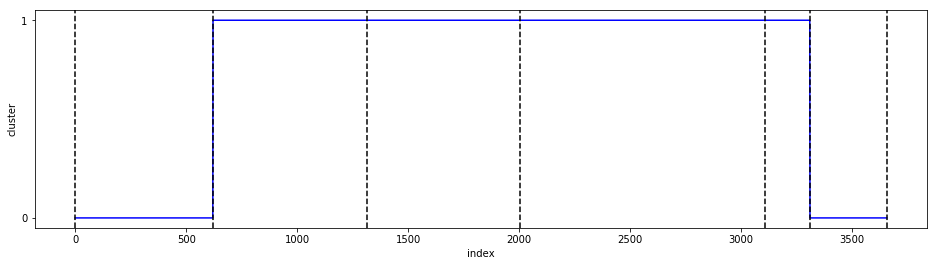

In [173]:
plt.figure(figsize=(16,4))
plt.plot(dfAll['y_pred'], 'b')

for xc in period_index:
    plt.axvline(x=xc, color='k', linestyle='dashed')
plt.xlabel('index')
plt.ylabel('cluster')
plt.yticks(list(set(wave['y_pred'])))
plt.show()

In [174]:
wave

,time,startIndex,endIndex,votpCross,indexMax,indexMin,frequency,votpMean,votpSpeed,accMean,gyroMean,gravityspeed,_acc,_gyro,y_pred
0,2018-07-17 14:34:50.146,0.0,621.0,1.317587,103.0,1.0,1.317587,0.390590,1.390989,1.335676,1.771463,1.192480,0.418680,0.370370,0
1,2018-07-17 14:35:10.638,621.0,1313.0,1.707830,25.0,14.0,1.707830,0.073978,1.816439,1.119900,0.581105,0.639865,0.306358,0.351156,1
2,2018-07-17 14:35:33.474,1313.0,2004.0,2.061042,17.0,13.0,2.061042,-0.023432,1.790811,1.149942,0.650738,0.773692,0.318379,0.331404,1
3,2018-07-17 14:35:56.278,2004.0,3107.0,2.582489,13.0,10.0,2.582489,-0.337614,2.190598,1.535974,1.390445,1.088355,0.364461,0.355394,1
4,2018-07-17 14:36:32.677,3107.0,3310.0,1.940588,22.0,12.0,1.940588,-0.053759,1.828117,1.140844,0.800495,0.736035,0.275862,0.369458,1
5,2018-07-17 14:36:39.376,3310.0,3656.0,0.788298,98.0,16.0,0.788298,0.302663,1.574877,1.346787,1.628959,1.259751,0.395954,0.329480,0
